# Resumen variables numéricas
## suicide-rates-vs-prevalence-of-depression

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# ignore all FutureWarnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

C:\Users\PC\AppData\Local\Temp\ipykernel_16492\561646326.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
# con pandas, leer une xlsx
excel_file = pd.ExcelFile('Mental health Depression disorder Data (1).xlsx')

# Sheet prevalence-by-mental-and-substa
dfs = {}  # Diccionario para almacenar los DataFrames
for sheet_name in excel_file.sheet_names:
    dfs[sheet_name] = excel_file.parse(sheet_name)

In [4]:
# Sheet suicide-rates-vs-prevalence-of-
suicide_rates = dfs['suicide-rates-vs-prevalence-of-']

In [5]:
suicide_rates = suicide_rates.dropna()
suicide_rates.head()

,Entity,Code,Year,"Suicide rate (deaths per 100,000 individuals)","Depressive disorder rates (number suffering per 100,000)",Population
190,Afghanistan,AFG,1990,10.318504,4039.755763,12412000.0
191,Afghanistan,AFG,1991,10.327010,4046.256034,13299000.0
192,Afghanistan,AFG,1992,10.271411,4053.709902,14486000.0
193,Afghanistan,AFG,1993,10.376123,4060.203474,15817000.0
194,Afghanistan,AFG,1994,10.575915,4062.290365,17076000.0


### Variables numéricas

In [6]:
suicide_rates.dtypes

Entity                                                       object
Code                                                         object
Year                                                         object
Suicide rate (deaths per 100,000 individuals)               float64
Depressive disorder rates (number suffering per 100,000)    float64
Population                                                  float64
dtype: object

| Nombre                    | Tipo de Dato | Tipo de variable      |
|---------------------------|--------------|-----------------------|
| Entity                    | object       | Cualitativa Nominal   |
| Code                      | object       | Cualitativa Nominal   |
| Year                      | int64        | Cuantitativa Discreta |
| Suicide rate (deaths per 100,000 individuals)         | float64      | Cuantitativa Continua |
| Depressive disorder rates (number suffering per 100,000)      | float64      | Cuantitativa Continua |
| Population      | float64      | Cuantitativa Continua |


### Análisis de dispersión de las variables numéricas

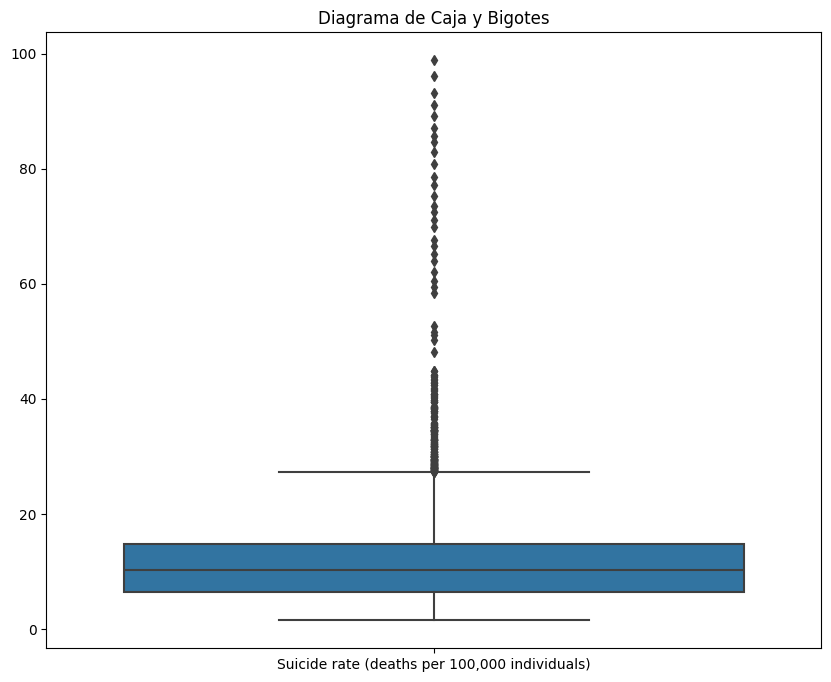

In [ ]:
plt.figure(figsize=(10, 8))
sns.boxplot(data=suicide_rates[['Suicide rate (deaths per 100,000 individuals)']])
plt.title('Diagrama de Caja y Bigotes')
plt.show()

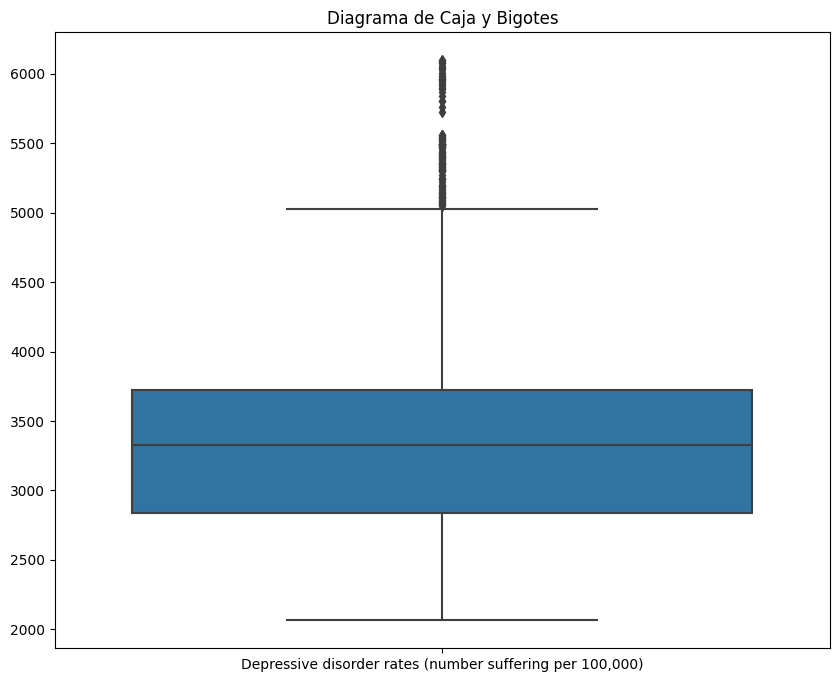

In [7]:
plt.figure(figsize=(10, 8))
sns.boxplot(data=suicide_rates[['Depressive disorder rates (number suffering per 100,000)']])
plt.title('Diagrama de Caja y Bigotes')
plt.show()

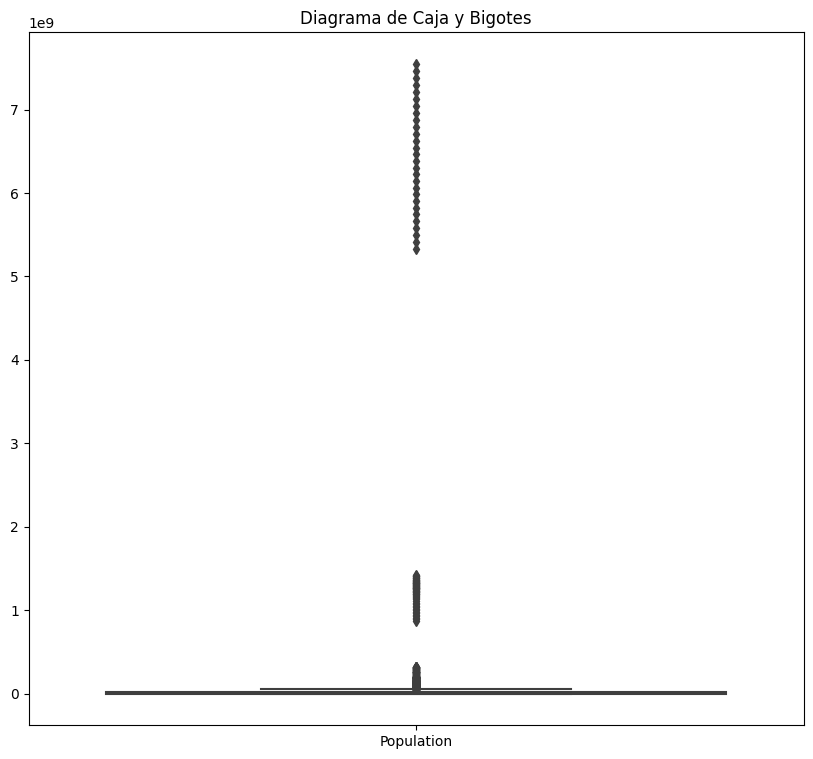

In [9]:
plt.figure(figsize=(10, 9))
sns.boxplot(data=suicide_rates[['Population']])
plt.title('Diagrama de Caja y Bigotes')
plt.show()

De las variables analizadas, dos de estas (tasa de suicidios, tasa de depresión) evalúan por cada 100,000 individuos, por lo que se puede decir que estas están en la misma escala.
Ahora la población es el número total de cada país.
Con los diagramas anteriores se puede observar que la variable con menos dispersión es la de la Tasa de Depresión, mientras que la variable con mayor dispersión es la de la población.

### Análisis de variables cuantitativas

#### Histogramas

##### Año
Tipo de distribución: Uniforme

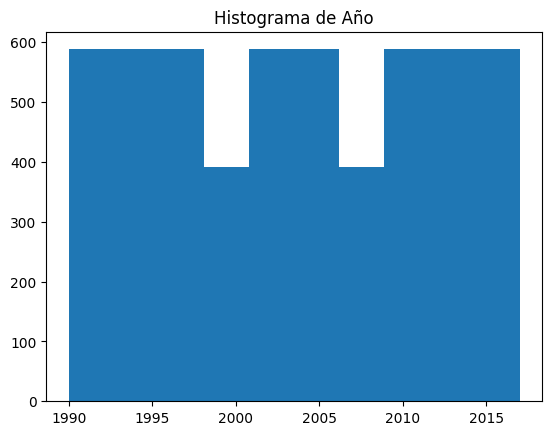

In [11]:
# suicide rate
plt.hist(suicide_rates['Year'], bins=10)
plt.title('Histograma de Año')
plt.show()

##### Tasas de Suicidio
Tipo de distribución: Asimétrica Positiva

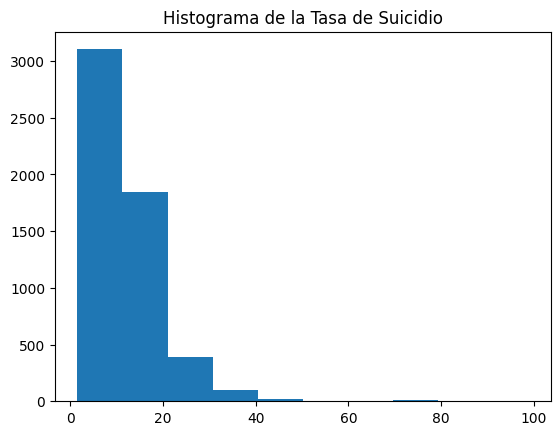

In [10]:
# suicide rate
plt.hist(suicide_rates['Suicide rate (deaths per 100,000 individuals)'], bins=10)
plt.title('Histograma de la Tasa de Suicidio')
plt.show()

##### Tasas de Depresión
Tipo de distribución: Asimétrica Positiva

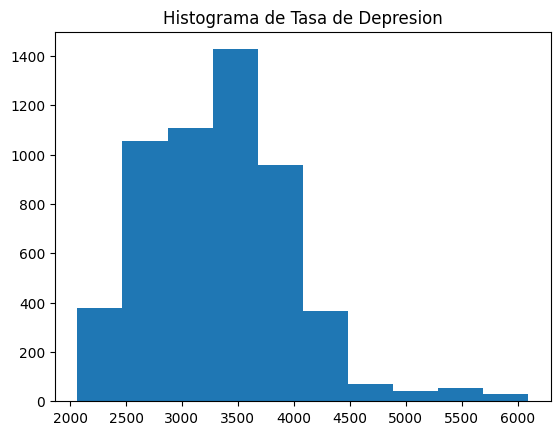

In [26]:
# Tasa de depresion
plt.hist(suicide_rates['Depressive disorder rates (number suffering per 100,000)'], bins=10)
plt.title('Histograma de Tasa de Depresion')
plt.show()

##### Población
Tipo de distribución: J' Invertida

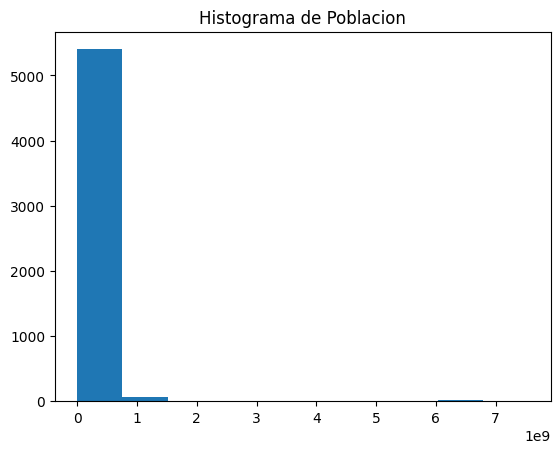

In [27]:
# poblacion
plt.hist(suicide_rates['Population'], bins=10)
plt.title('Histograma de Poblacion')
plt.show()

#### Análisis de correlación
Dentro de este set de datos, se puede observar que las variables númericas con mayor correlación son:
- La tasa de suicidios y la tasa de depresión


In [32]:
matriz_correlacion_pms = suicide_rates[['Suicide rate (deaths per 100,000 individuals)', 'Depressive disorder rates (number suffering per 100,000)', 'Population']].corr()

matriz_correlacion_pms

,"Suicide rate (deaths per 100,000 individuals)","Depressive disorder rates (number suffering per 100,000)",Population
"Suicide rate (deaths per 100,000 individuals)",1.000000,0.413362,0.011471
"Depressive disorder rates (number suffering per 100,000)",0.413362,1.000000,0.017148
Population,0.011471,0.017148,1.000000


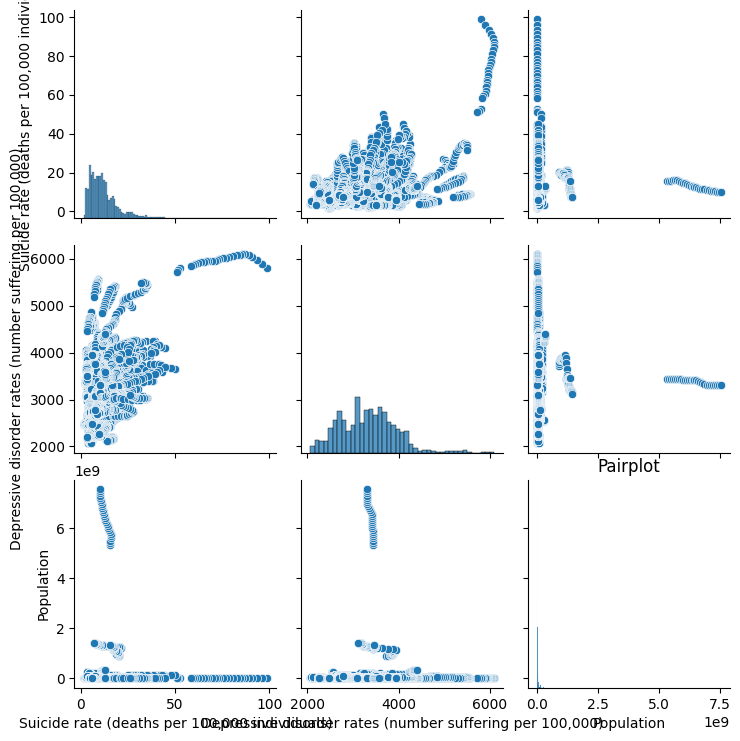

In [33]:
# Pairplot
sns.pairplot(suicide_rates[['Suicide rate (deaths per 100,000 individuals)', 'Depressive disorder rates (number suffering per 100,000)', 'Population']])
plt.title('Pairplot')
plt.show()

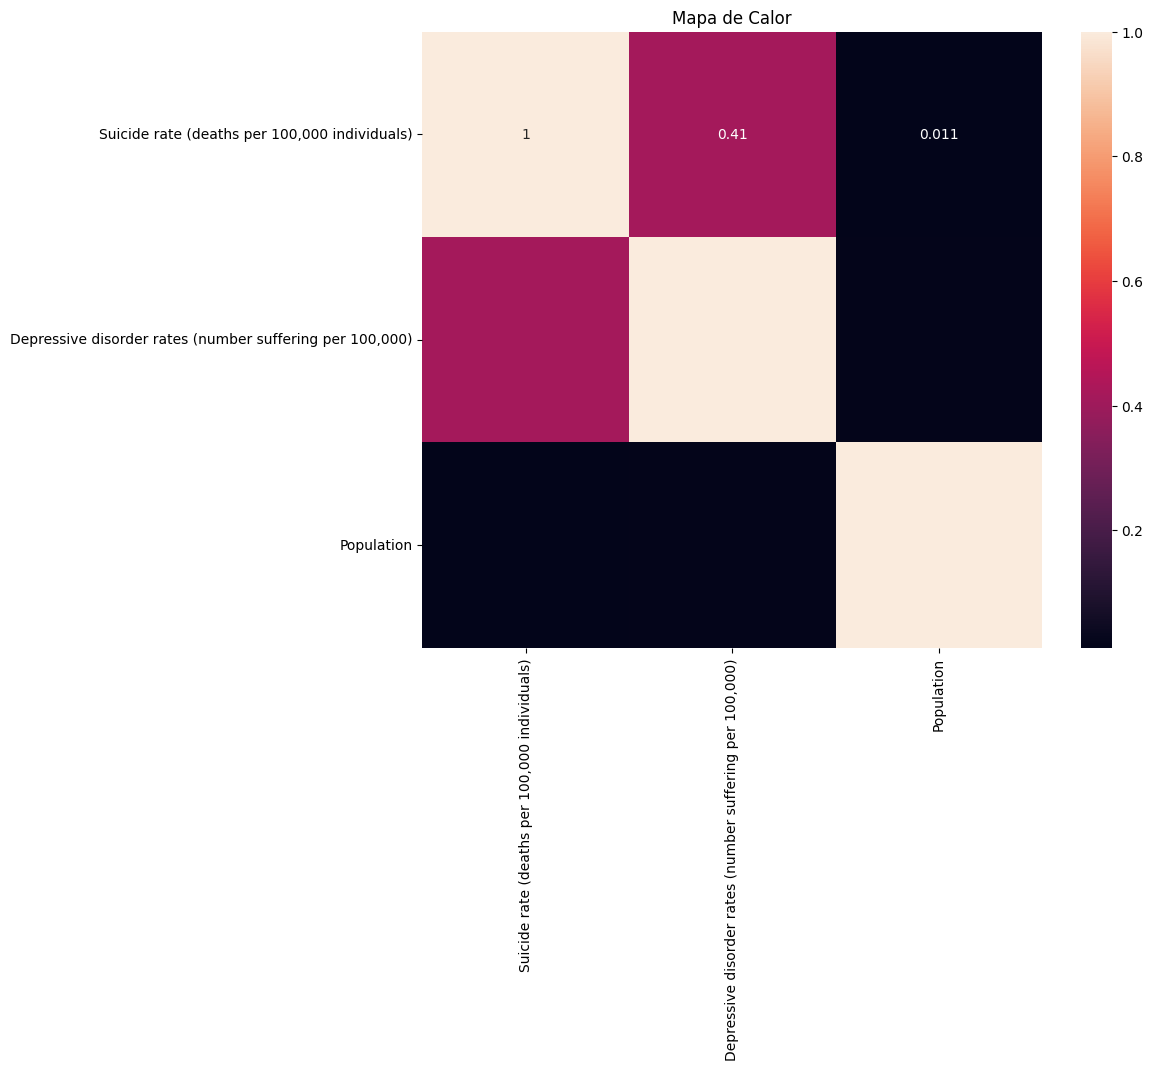

In [34]:
# Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(matriz_correlacion_pms, annot=True)
plt.title('Mapa de Calor')
plt.show()

### Análisis de variables cualitativas

#### Tablas de frecuencia

##### Entity

In [35]:
suicide_rates['Entity'].value_counts()

Entity
Afghanistan    28
New Zealand    28
Niger          28
Nigeria        28
North Korea    28
               ..
Greece         28
Greenland      28
Grenada        28
Guam           28
Zimbabwe       28
Name: count, Length: 196, dtype: int64

##### Code

In [36]:
suicide_rates['Code'].value_counts()

Code
AFG    28
NZL    28
NER    28
NGA    28
PRK    28
       ..
GRC    28
GRL    28
GRD    28
GUM    28
ZWE    28
Name: count, Length: 196, dtype: int64